In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import os

# Set plot style and parameters
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

# Define color palette for consistency
COLORS = {
    'net': '#2E86AB',       # Blue
    'operating': '#A23B72', # Purple
    'financing': '#F18F01'  # Orange
}

# Weekly Cash Flow EDA

This notebook performs comprehensive exploratory data analysis on weekly cash flow data across multiple countries.

**Dataset**: `processed_weekly_cashflow.csv`

**Columns**:
- `Country_Name`: Country identifier
- `Week_Ending_Date`: Week ending date
- `Net_Cash_Flow`: Net cash flow
- `Operating_Cash_Flow`: Operating cash flow
- `Financing_Cash_Flow`: Financing cash flow

## 1. Data Loading and Validation

In [26]:
# Load Data
dataset_path = os.path.join('..', '..', 'data', 'model_dataset', 'processed_weekly_cashflow.csv')

if os.path.exists(dataset_path):
    df = pd.read_csv(dataset_path)
    # Strip whitespace from column names
    df.columns = df.columns.str.strip()
    print(f"✓ Data loaded successfully. Shape: {df.shape}")
else:
    print(f"✗ File not found at {dataset_path}")

# Convert date column to datetime
df['Week_Ending_Date'] = pd.to_datetime(df['Week_Ending_Date'])

# Display basic info
print(f"\nDate range: {df['Week_Ending_Date'].min()} to {df['Week_Ending_Date'].max()}")
print(f"Number of countries: {df['Country_Name'].nunique()}")
print(f"Countries: {df['Country_Name'].unique().tolist()}")

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Display first few rows
print("\nFirst few rows:")
df.head()

✓ Data loaded successfully. Shape: (352, 5)

Date range: 2025-01-05 00:00:00 to 2025-11-02 00:00:00
Number of countries: 8
Countries: ['ID', 'KR', 'MY', 'PH', 'SS', 'TH', 'TW', 'VN']

Missing values:
Country_Name           0
Week_Ending_Date       0
Net_Cash_Flow          0
Operating_Cash_Flow    0
Financing_Cash_Flow    0
dtype: int64

First few rows:


,Country_Name,Week_Ending_Date,Net_Cash_Flow,Operating_Cash_Flow,Financing_Cash_Flow
0,ID,2025-01-05,-7287.13095,-7288.41060,0.0
1,ID,2025-01-12,-11488.45084,-10990.56054,0.0
2,ID,2025-01-19,-17737.45698,-17529.16706,0.0
3,ID,2025-01-26,-9078.43305,-9098.75230,0.0
4,ID,2025-02-02,-10682.43288,-11082.71006,0.0


## 2. Summary Statistics

In [27]:
# Summary statistics by cash flow type
print("Summary Statistics by Cash Flow Type")
print("=" * 80)

summary_stats = df[['Net_Cash_Flow', 'Operating_Cash_Flow', 'Financing_Cash_Flow']].describe()
summary_stats.loc['skew'] = df[['Net_Cash_Flow', 'Operating_Cash_Flow', 'Financing_Cash_Flow']].skew()
summary_stats.loc['kurt'] = df[['Net_Cash_Flow', 'Operating_Cash_Flow', 'Financing_Cash_Flow']].kurt()

print(summary_stats)

# Summary statistics by country
print("\n\nSummary Statistics by Country (Mean Values)")
print("=" * 80)
country_summary = df.groupby('Country_Name')[['Net_Cash_Flow', 'Operating_Cash_Flow', 'Financing_Cash_Flow']].agg(['mean', 'std', 'min', 'max'])
print(country_summary)

Summary Statistics by Cash Flow Type
       Net_Cash_Flow  Operating_Cash_Flow  Financing_Cash_Flow
count     352.000000           352.000000           352.000000
mean   -11818.229062        -11822.018910            -9.441225
std      7499.222458          7515.938214           187.081438
min    -40211.071660        -40240.096060          -851.610000
25%    -15310.891983        -15321.207613             0.000000
50%    -10808.171685        -10834.012705             0.000000
75%     -7222.719627         -7067.058435             0.000000
max       548.478270             0.000000          2339.138060
skew       -0.961556            -1.017364             5.509516
kurt        1.484368             1.580244            81.135574


Summary Statistics by Country (Mean Values)
             Net_Cash_Flow                                        \
                      mean          std          min         max   
Country_Name                                                       
ID           -12583.

## 3. Time Series Visualizations - Individual Cash Flow Types

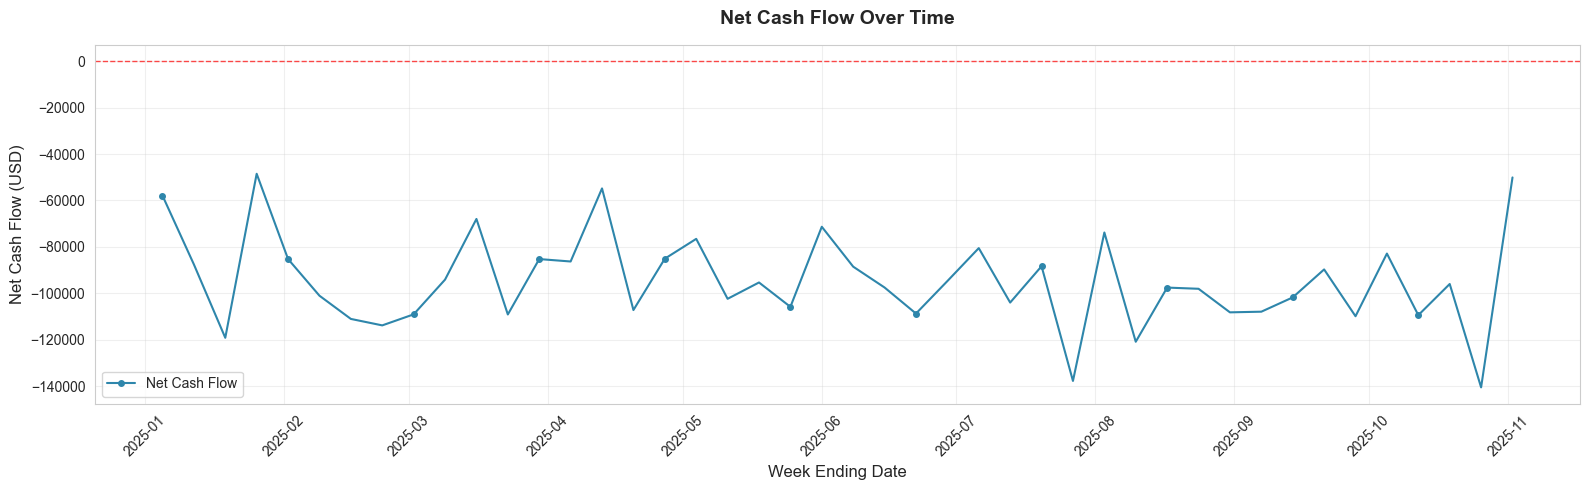

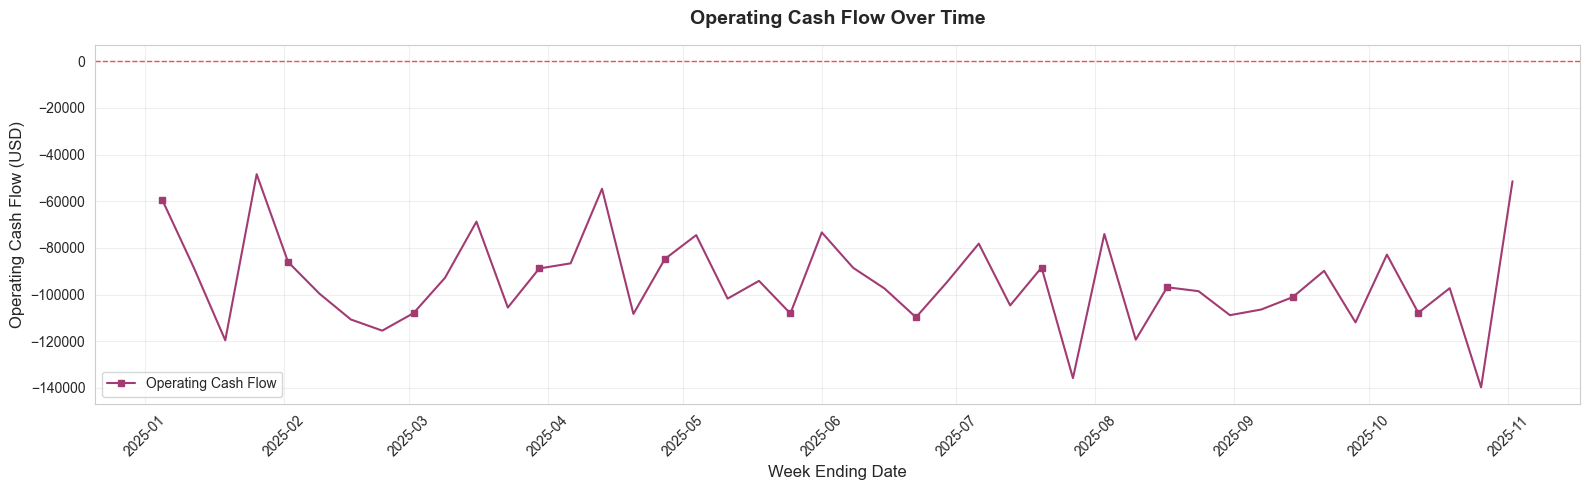

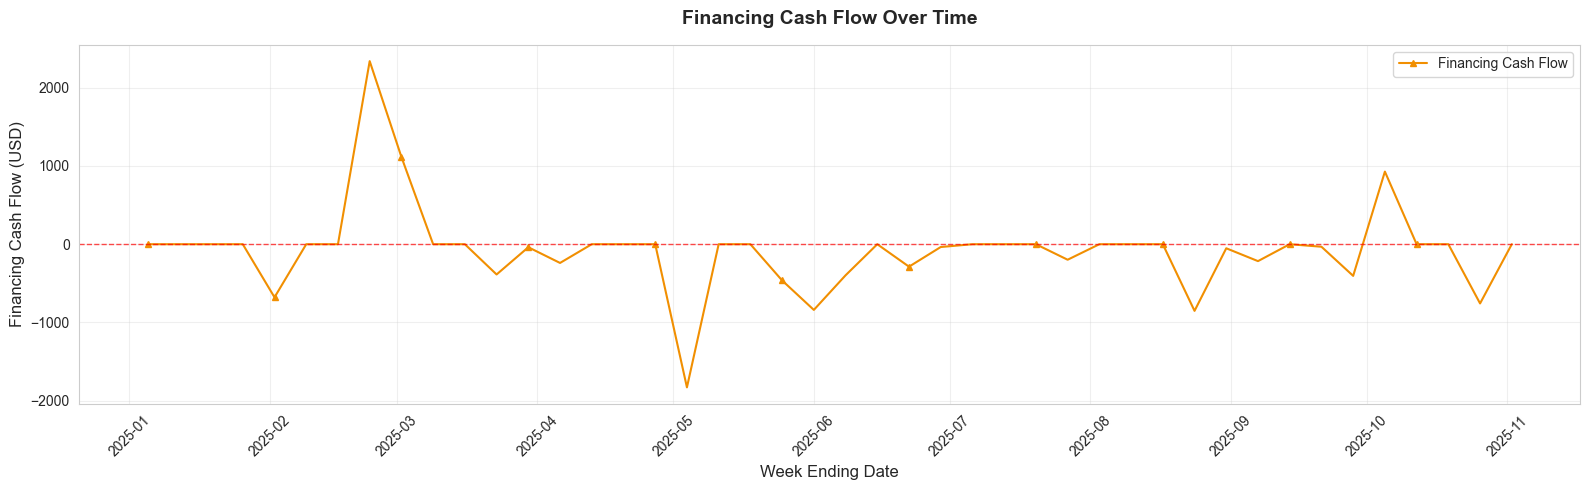

In [28]:
# Prepare data for time series (aggregate by week across all countries)
ts_data = df.groupby('Week_Ending_Date')[['Net_Cash_Flow', 'Operating_Cash_Flow', 'Financing_Cash_Flow']].sum().reset_index()
ts_data.set_index('Week_Ending_Date', inplace=True)

# 3a. Net Cash Flow Time Series
fig, ax = plt.subplots(figsize=(16, 5))
ax.plot(ts_data.index, ts_data['Net_Cash_Flow'], linewidth=1.5, color=COLORS['net'], 
        marker='o', markevery=4, markersize=4, label='Net Cash Flow')
ax.axhline(0, color='red', linestyle='--', linewidth=1, alpha=0.7)
ax.set_title('Net Cash Flow Over Time', fontweight='bold', pad=15)
ax.set_xlabel('Week Ending Date')
ax.set_ylabel('Net Cash Flow (USD)')
ax.grid(True, alpha=0.3)
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3b. Operating Cash Flow Time Series
fig, ax = plt.subplots(figsize=(16, 5))
ax.plot(ts_data.index, ts_data['Operating_Cash_Flow'], linewidth=1.5, color=COLORS['operating'],
        marker='s', markevery=4, markersize=4, label='Operating Cash Flow')
ax.axhline(0, color='red', linestyle='--', linewidth=1, alpha=0.7)
ax.set_title('Operating Cash Flow Over Time', fontweight='bold', pad=15)
ax.set_xlabel('Week Ending Date')
ax.set_ylabel('Operating Cash Flow (USD)')
ax.grid(True, alpha=0.3)
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3c. Financing Cash Flow Time Series
fig, ax = plt.subplots(figsize=(16, 5))
ax.plot(ts_data.index, ts_data['Financing_Cash_Flow'], linewidth=1.5, color=COLORS['financing'],
        marker='^', markevery=4, markersize=4, label='Financing Cash Flow')
ax.axhline(0, color='red', linestyle='--', linewidth=1, alpha=0.7)
ax.set_title('Financing Cash Flow Over Time', fontweight='bold', pad=15)
ax.set_xlabel('Week Ending Date')
ax.set_ylabel('Financing Cash Flow (USD)')
ax.grid(True, alpha=0.3)
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

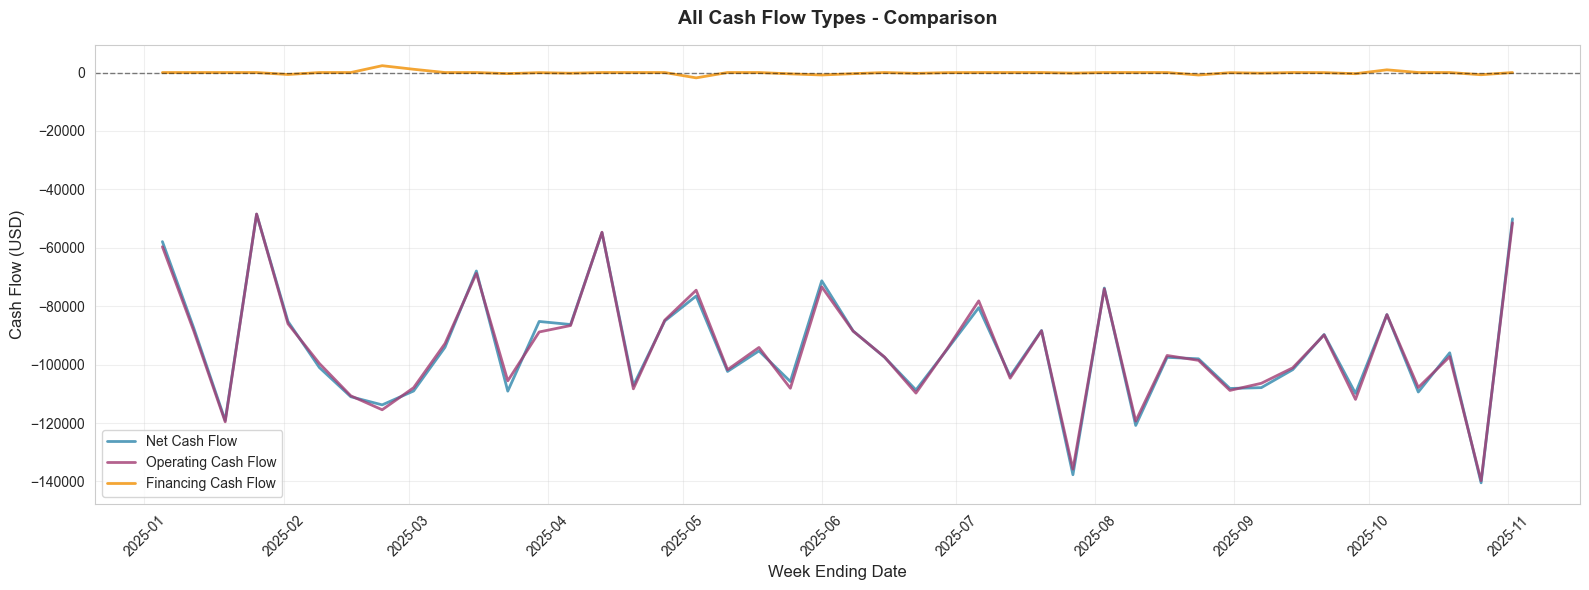

In [29]:
# 3d. All Three Cash Flows Combined
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(ts_data.index, ts_data['Net_Cash_Flow'], linewidth=2, color=COLORS['net'], 
        alpha=0.8, label='Net Cash Flow')
ax.plot(ts_data.index, ts_data['Operating_Cash_Flow'], linewidth=2, color=COLORS['operating'], 
        alpha=0.8, label='Operating Cash Flow')
ax.plot(ts_data.index, ts_data['Financing_Cash_Flow'], linewidth=2, color=COLORS['financing'], 
        alpha=0.8, label='Financing Cash Flow')
ax.axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax.set_title('All Cash Flow Types - Comparison', fontweight='bold', pad=15)
ax.set_xlabel('Week Ending Date')
ax.set_ylabel('Cash Flow (USD)')
ax.grid(True, alpha=0.3)
ax.legend(loc='best', frameon=True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Country-Level Analysis

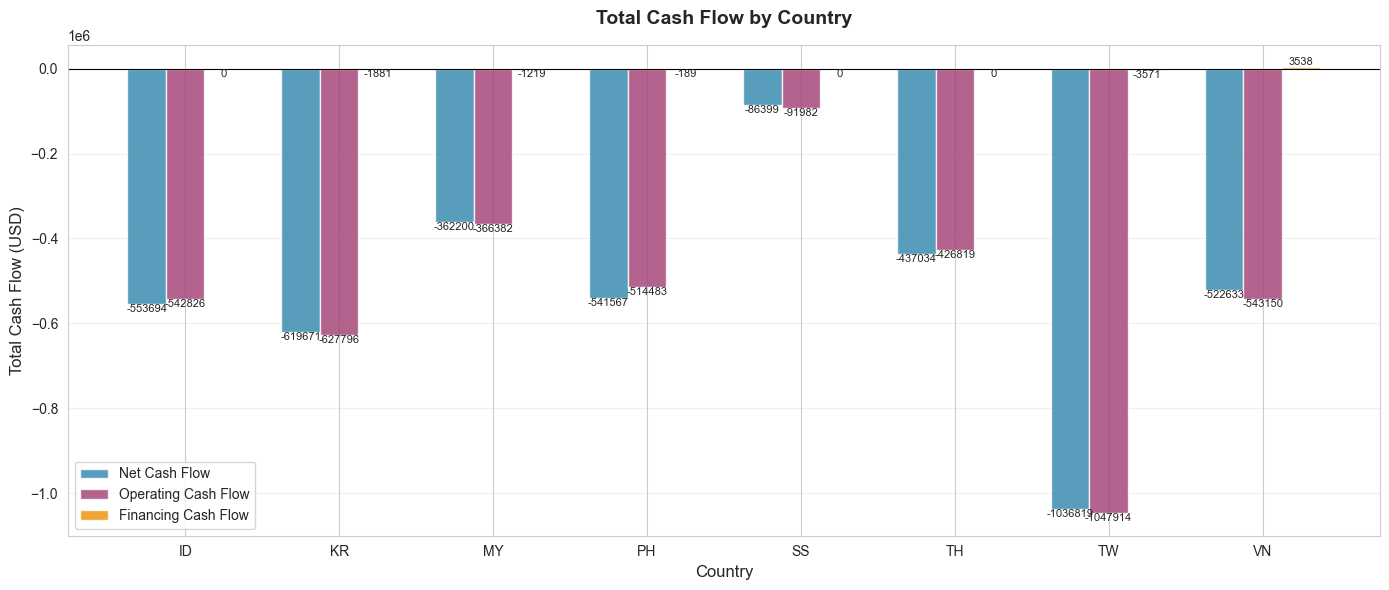

In [30]:
# 4a. Total Cash Flow by Country - Grouped Bar Chart
country_totals = df.groupby('Country_Name')[['Net_Cash_Flow', 'Operating_Cash_Flow', 'Financing_Cash_Flow']].sum()

fig, ax = plt.subplots(figsize=(14, 6))
x = np.arange(len(country_totals.index))
width = 0.25

bars1 = ax.bar(x - width, country_totals['Net_Cash_Flow'], width, label='Net Cash Flow', 
               color=COLORS['net'], alpha=0.8)
bars2 = ax.bar(x, country_totals['Operating_Cash_Flow'], width, label='Operating Cash Flow', 
               color=COLORS['operating'], alpha=0.8)
bars3 = ax.bar(x + width, country_totals['Financing_Cash_Flow'], width, label='Financing Cash Flow', 
               color=COLORS['financing'], alpha=0.8)

ax.set_title('Total Cash Flow by Country', fontweight='bold', pad=15)
ax.set_xlabel('Country')
ax.set_ylabel('Total Cash Flow (USD)')
ax.set_xticks(x)
ax.set_xticklabels(country_totals.index)
ax.legend(frameon=True)
ax.grid(True, alpha=0.3, axis='y')
ax.axhline(0, color='black', linewidth=0.8)

# Add value labels on bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.0f}',
                ha='center', va='bottom' if height > 0 else 'top', fontsize=8)

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)

plt.tight_layout()
plt.show()

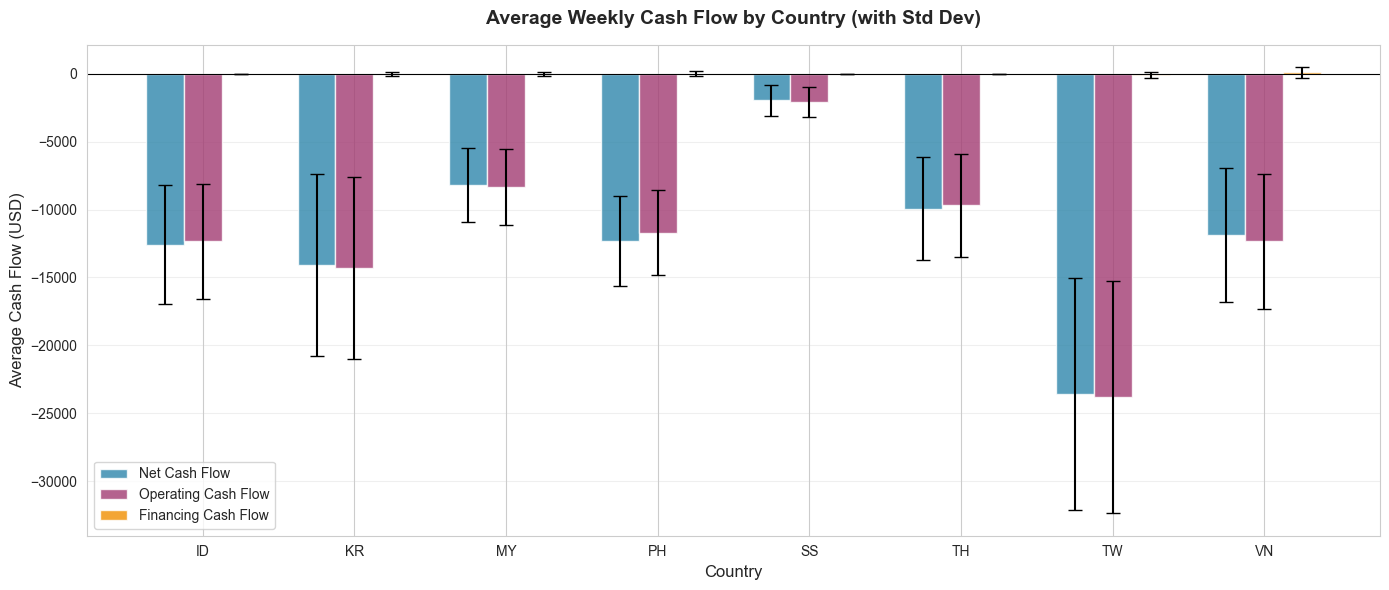

In [31]:
# 4b. Average Weekly Cash Flow by Country with Error Bars
country_avg = df.groupby('Country_Name')[['Net_Cash_Flow', 'Operating_Cash_Flow', 'Financing_Cash_Flow']].mean()
country_std = df.groupby('Country_Name')[['Net_Cash_Flow', 'Operating_Cash_Flow', 'Financing_Cash_Flow']].std()

fig, ax = plt.subplots(figsize=(14, 6))
x = np.arange(len(country_avg.index))
width = 0.25

ax.bar(x - width, country_avg['Net_Cash_Flow'], width, yerr=country_std['Net_Cash_Flow'],
       label='Net Cash Flow', color=COLORS['net'], alpha=0.8, capsize=5)
ax.bar(x, country_avg['Operating_Cash_Flow'], width, yerr=country_std['Operating_Cash_Flow'],
       label='Operating Cash Flow', color=COLORS['operating'], alpha=0.8, capsize=5)
ax.bar(x + width, country_avg['Financing_Cash_Flow'], width, yerr=country_std['Financing_Cash_Flow'],
       label='Financing Cash Flow', color=COLORS['financing'], alpha=0.8, capsize=5)

ax.set_title('Average Weekly Cash Flow by Country (with Std Dev)', fontweight='bold', pad=15)
ax.set_xlabel('Country')
ax.set_ylabel('Average Cash Flow (USD)')
ax.set_xticks(x)
ax.set_xticklabels(country_avg.index)
ax.legend(frameon=True)
ax.grid(True, alpha=0.3, axis='y')
ax.axhline(0, color='black', linewidth=0.8)

plt.tight_layout()
plt.show()

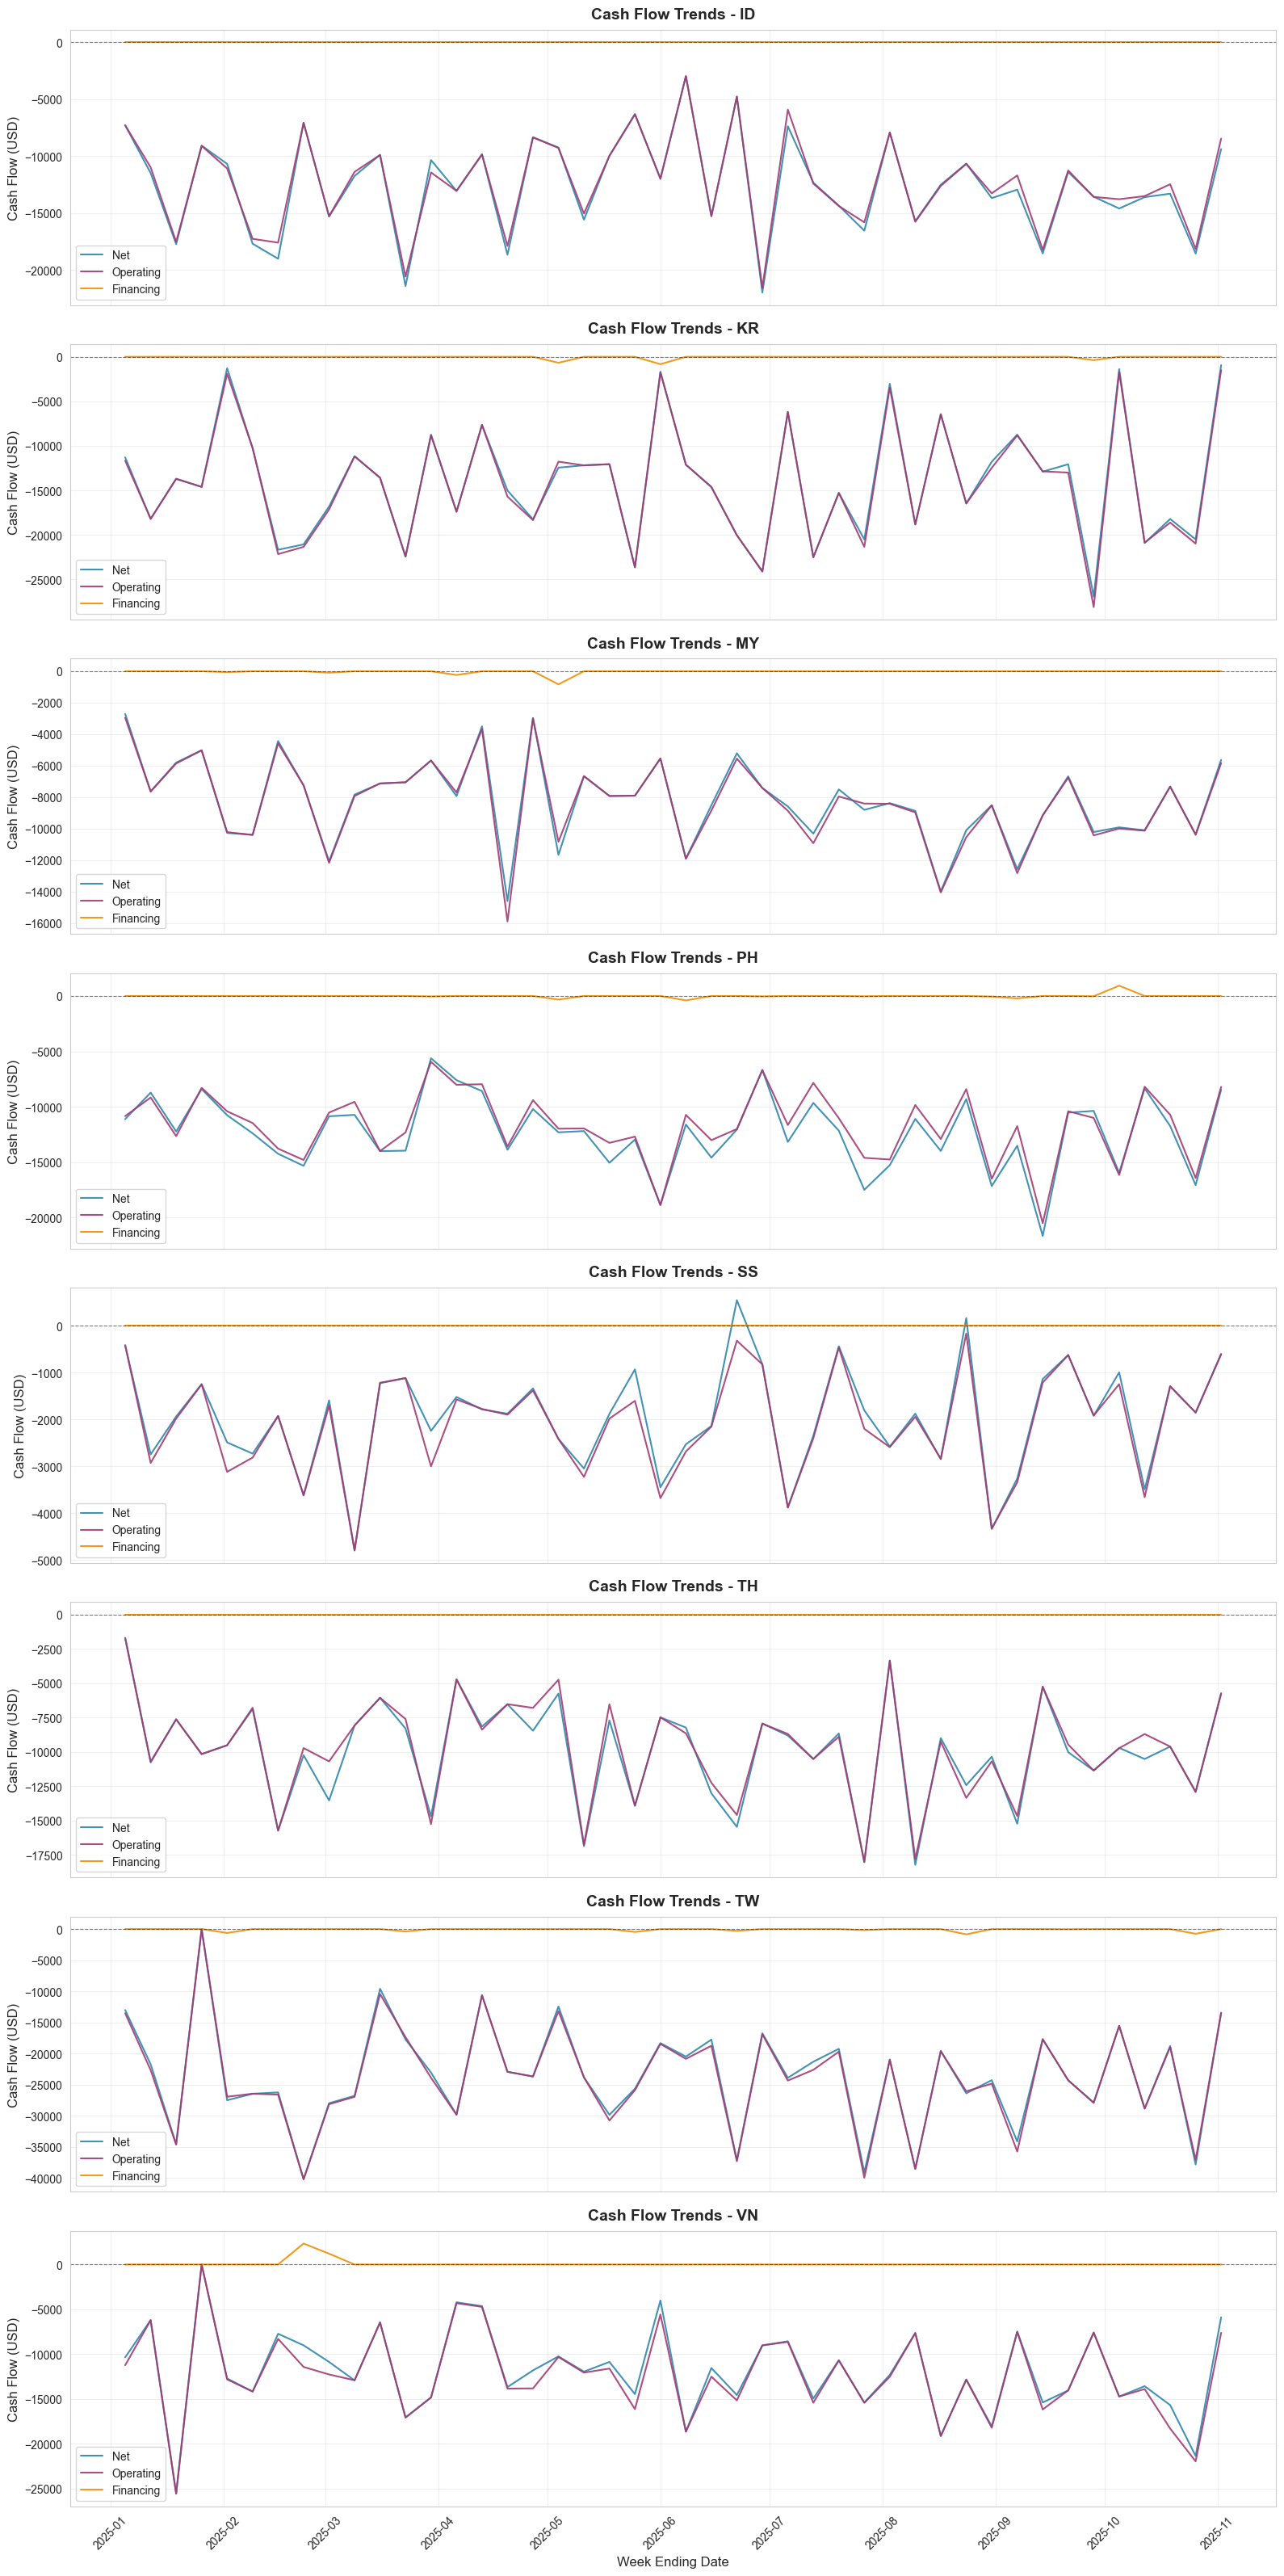

In [32]:
# 4c. Cash Flow Time Series by Country (Small Multiples)
countries = df['Country_Name'].unique()
num_countries = len(countries)

fig, axes = plt.subplots(num_countries, 1, figsize=(16, 4 * num_countries), sharex=True)

# Handle case where there's only one country
if num_countries == 1:
    axes = [axes]

for idx, country in enumerate(countries):
    country_data = df[df['Country_Name'] == country].copy()
    country_data = country_data.sort_values('Week_Ending_Date')
    
    ax = axes[idx]
    ax.plot(country_data['Week_Ending_Date'], country_data['Net_Cash_Flow'], 
            linewidth=1.5, color=COLORS['net'], label='Net', alpha=0.9)
    ax.plot(country_data['Week_Ending_Date'], country_data['Operating_Cash_Flow'], 
            linewidth=1.5, color=COLORS['operating'], label='Operating', alpha=0.9)
    ax.plot(country_data['Week_Ending_Date'], country_data['Financing_Cash_Flow'], 
            linewidth=1.5, color=COLORS['financing'], label='Financing', alpha=0.9)
    
    ax.axhline(0, color='black', linestyle='--', linewidth=0.8, alpha=0.5)
    ax.set_title(f'Cash Flow Trends - {country}', fontweight='bold', pad=10)
    ax.set_ylabel('Cash Flow (USD)')
    ax.grid(True, alpha=0.3)
    ax.legend(loc='best', frameon=True)

axes[-1].set_xlabel('Week Ending Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. Distribution Analysis

C:\Users\Owner\AppData\Local\Temp\ipykernel_20992\1310060170.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp1 = axes[0].boxplot([df['Net_Cash_Flow']], labels=['Net'], patch_artist=True,
C:\Users\Owner\AppData\Local\Temp\ipykernel_20992\1310060170.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp2 = axes[1].boxplot([df['Operating_Cash_Flow']], labels=['Operating'], patch_artist=True,
C:\Users\Owner\AppData\Local\Temp\ipykernel_20992\1310060170.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp3 = axes[2].boxplot([df['Financing_Cash_Flow']], labels=['Financing'], patch_artist=True,


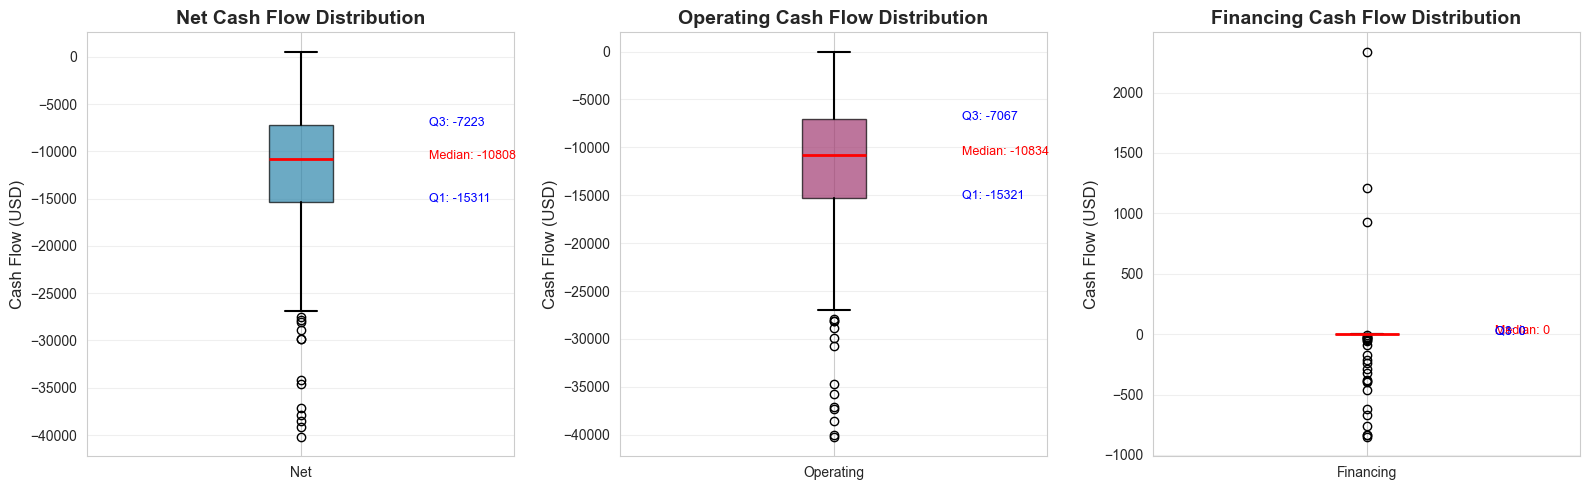

In [33]:
# 5a. Boxplots for Each Cash Flow Type
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Net Cash Flow
bp1 = axes[0].boxplot([df['Net_Cash_Flow']], labels=['Net'], patch_artist=True,
                       boxprops=dict(facecolor=COLORS['net'], alpha=0.7),
                       medianprops=dict(color='red', linewidth=2),
                       whiskerprops=dict(linewidth=1.5),
                       capprops=dict(linewidth=1.5))
axes[0].set_title('Net Cash Flow Distribution', fontweight='bold')
axes[0].set_ylabel('Cash Flow (USD)')
axes[0].grid(True, alpha=0.3, axis='y')

# Add quartile labels
q1, median, q3 = df['Net_Cash_Flow'].quantile([0.25, 0.5, 0.75])
axes[0].text(1.3, q1, f'Q1: {q1:.0f}', fontsize=9, color='blue')
axes[0].text(1.3, median, f'Median: {median:.0f}', fontsize=9, color='red')
axes[0].text(1.3, q3, f'Q3: {q3:.0f}', fontsize=9, color='blue')

# Operating Cash Flow
bp2 = axes[1].boxplot([df['Operating_Cash_Flow']], labels=['Operating'], patch_artist=True,
                       boxprops=dict(facecolor=COLORS['operating'], alpha=0.7),
                       medianprops=dict(color='red', linewidth=2),
                       whiskerprops=dict(linewidth=1.5),
                       capprops=dict(linewidth=1.5))
axes[1].set_title('Operating Cash Flow Distribution', fontweight='bold')
axes[1].set_ylabel('Cash Flow (USD)')
axes[1].grid(True, alpha=0.3, axis='y')

q1, median, q3 = df['Operating_Cash_Flow'].quantile([0.25, 0.5, 0.75])
axes[1].text(1.3, q1, f'Q1: {q1:.0f}', fontsize=9, color='blue')
axes[1].text(1.3, median, f'Median: {median:.0f}', fontsize=9, color='red')
axes[1].text(1.3, q3, f'Q3: {q3:.0f}', fontsize=9, color='blue')

# Financing Cash Flow
bp3 = axes[2].boxplot([df['Financing_Cash_Flow']], labels=['Financing'], patch_artist=True,
                       boxprops=dict(facecolor=COLORS['financing'], alpha=0.7),
                       medianprops=dict(color='red', linewidth=2),
                       whiskerprops=dict(linewidth=1.5),
                       capprops=dict(linewidth=1.5))
axes[2].set_title('Financing Cash Flow Distribution', fontweight='bold')
axes[2].set_ylabel('Cash Flow (USD)')
axes[2].grid(True, alpha=0.3, axis='y')

q1, median, q3 = df['Financing_Cash_Flow'].quantile([0.25, 0.5, 0.75])
axes[2].text(1.3, q1, f'Q1: {q1:.0f}', fontsize=9, color='blue')
axes[2].text(1.3, median, f'Median: {median:.0f}', fontsize=9, color='red')
axes[2].text(1.3, q3, f'Q3: {q3:.0f}', fontsize=9, color='blue')

plt.tight_layout()
plt.show()

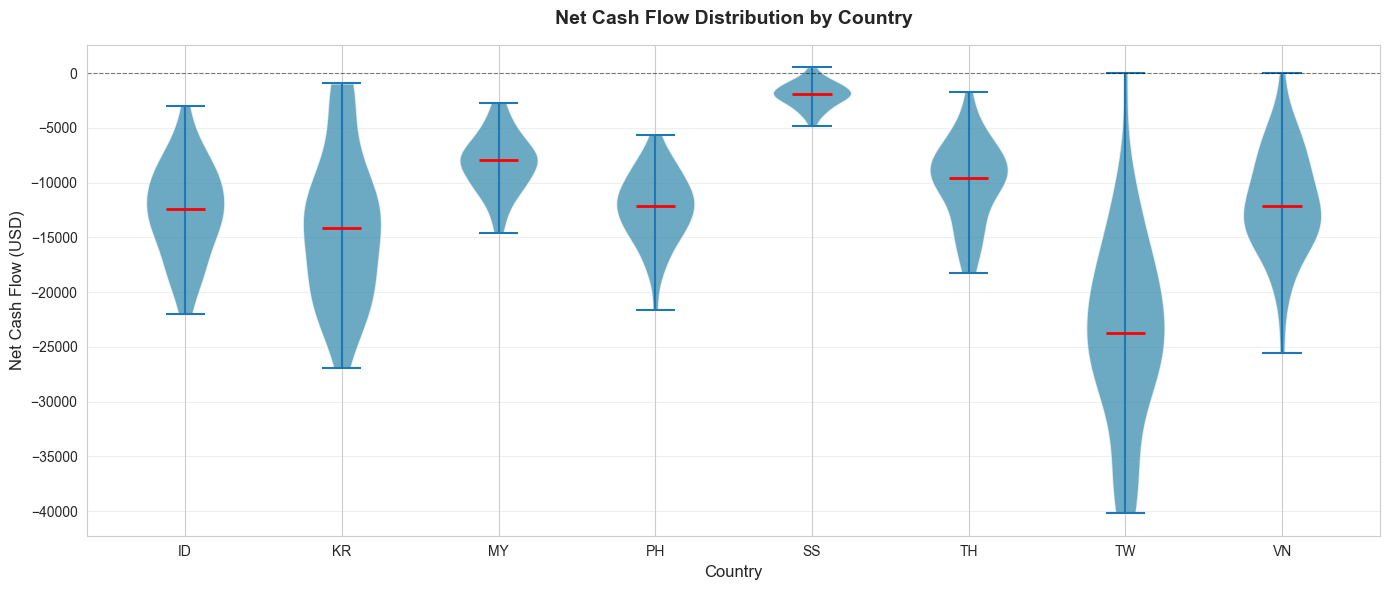

In [34]:
# 5b. Violin Plot - Net Cash Flow by Country
fig, ax = plt.subplots(figsize=(14, 6))

parts = ax.violinplot([df[df['Country_Name'] == country]['Net_Cash_Flow'].values 
                       for country in countries],
                      positions=range(len(countries)),
                      showmeans=False, showmedians=True)

# Color the violin plots
for pc in parts['bodies']:
    pc.set_facecolor(COLORS['net'])
    pc.set_alpha(0.7)

parts['cmedians'].set_color('red')
parts['cmedians'].set_linewidth(2)

ax.set_title('Net Cash Flow Distribution by Country', fontweight='bold', pad=15)
ax.set_xlabel('Country')
ax.set_ylabel('Net Cash Flow (USD)')
ax.set_xticks(range(len(countries)))
ax.set_xticklabels(countries)
ax.grid(True, alpha=0.3, axis='y')
ax.axhline(0, color='black', linestyle='--', linewidth=0.8, alpha=0.5)

plt.tight_layout()
plt.show()

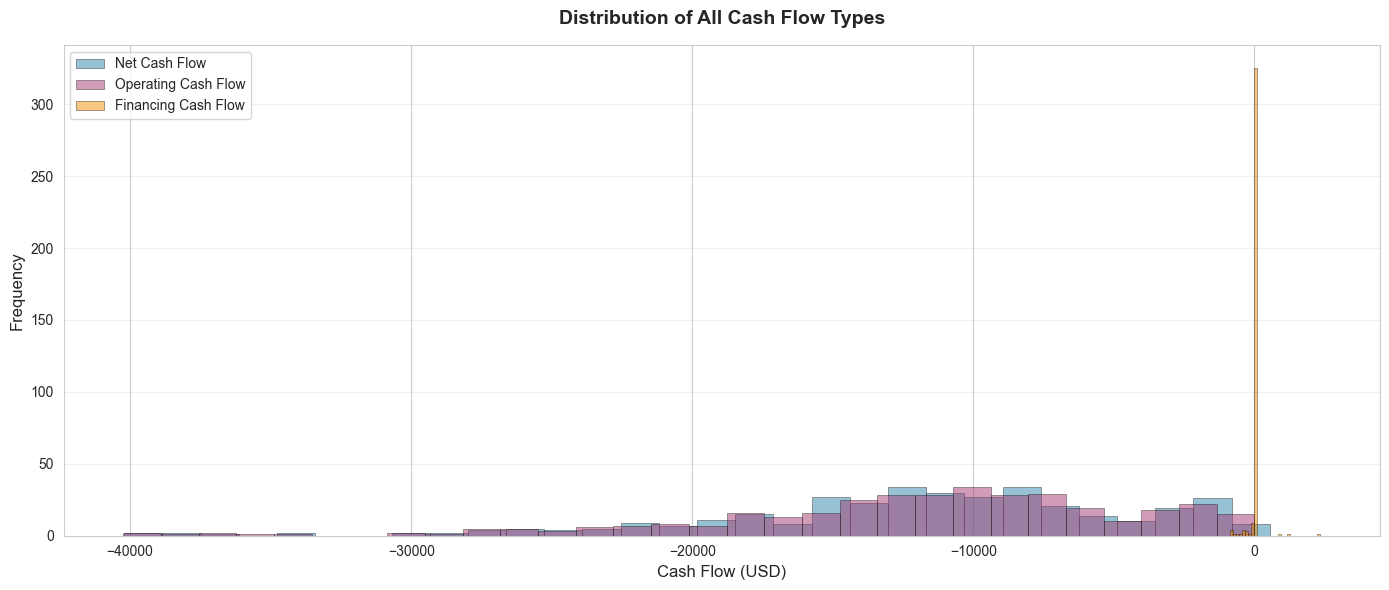

Skewness and Kurtosis:
Net Cash Flow - Skewness: -0.96, Kurtosis: 1.48
Operating Cash Flow - Skewness: -1.02, Kurtosis: 1.58
Financing Cash Flow - Skewness: 5.51, Kurtosis: 81.14


In [35]:
# 5c. Histograms with KDE - All Cash Flow Types
fig, ax = plt.subplots(figsize=(14, 6))

ax.hist(df['Net_Cash_Flow'], bins=30, alpha=0.5, color=COLORS['net'], 
        label='Net Cash Flow', edgecolor='black', linewidth=0.5)
ax.hist(df['Operating_Cash_Flow'], bins=30, alpha=0.5, color=COLORS['operating'], 
        label='Operating Cash Flow', edgecolor='black', linewidth=0.5)
ax.hist(df['Financing_Cash_Flow'], bins=30, alpha=0.5, color=COLORS['financing'], 
        label='Financing Cash Flow', edgecolor='black', linewidth=0.5)

ax.set_title('Distribution of All Cash Flow Types', fontweight='bold', pad=15)
ax.set_xlabel('Cash Flow (USD)')
ax.set_ylabel('Frequency')
ax.legend(frameon=True)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Print skewness and kurtosis
print("Skewness and Kurtosis:")
print(f"Net Cash Flow - Skewness: {df['Net_Cash_Flow'].skew():.2f}, Kurtosis: {df['Net_Cash_Flow'].kurt():.2f}")
print(f"Operating Cash Flow - Skewness: {df['Operating_Cash_Flow'].skew():.2f}, Kurtosis: {df['Operating_Cash_Flow'].kurt():.2f}")
print(f"Financing Cash Flow - Skewness: {df['Financing_Cash_Flow'].skew():.2f}, Kurtosis: {df['Financing_Cash_Flow'].kurt():.2f}")

## 6. Rolling Statistics - Enhanced

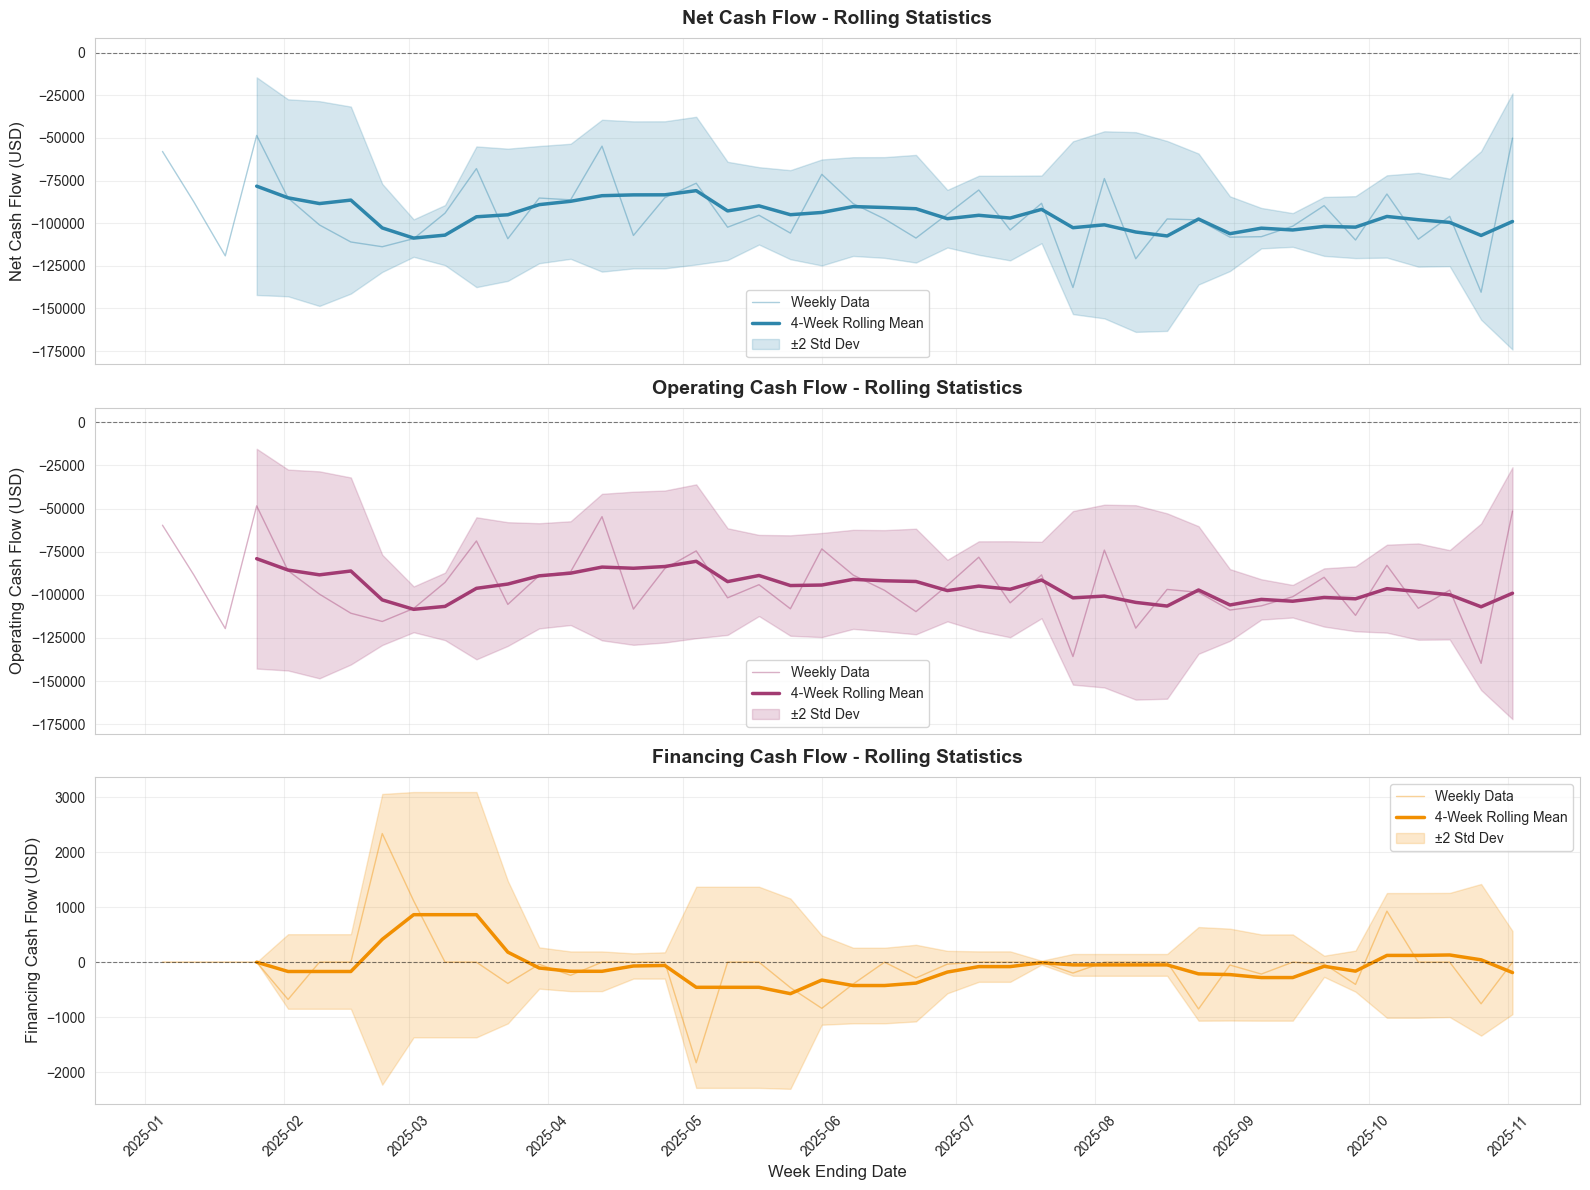

In [36]:
# Calculate rolling statistics for aggregated time series
window = 4
rolling_net_mean = ts_data['Net_Cash_Flow'].rolling(window=window).mean()
rolling_net_std = ts_data['Net_Cash_Flow'].rolling(window=window).std()

rolling_op_mean = ts_data['Operating_Cash_Flow'].rolling(window=window).mean()
rolling_op_std = ts_data['Operating_Cash_Flow'].rolling(window=window).std()

rolling_fin_mean = ts_data['Financing_Cash_Flow'].rolling(window=window).mean()
rolling_fin_std = ts_data['Financing_Cash_Flow'].rolling(window=window).std()

# Create subplots for rolling statistics
fig, axes = plt.subplots(3, 1, figsize=(16, 12), sharex=True)

# Net Cash Flow
axes[0].plot(ts_data.index, ts_data['Net_Cash_Flow'], linewidth=1, color=COLORS['net'], 
             alpha=0.4, label='Weekly Data')
axes[0].plot(ts_data.index, rolling_net_mean, linewidth=2.5, color=COLORS['net'], 
             label=f'{window}-Week Rolling Mean')
axes[0].fill_between(ts_data.index, 
                     rolling_net_mean - 2 * rolling_net_std,
                     rolling_net_mean + 2 * rolling_net_std,
                     color=COLORS['net'], alpha=0.2, label='±2 Std Dev')
axes[0].axhline(0, color='black', linestyle='--', linewidth=0.8, alpha=0.5)
axes[0].set_title('Net Cash Flow - Rolling Statistics', fontweight='bold', pad=10)
axes[0].set_ylabel('Net Cash Flow (USD)')
axes[0].legend(loc='best', frameon=True)
axes[0].grid(True, alpha=0.3)

# Operating Cash Flow
axes[1].plot(ts_data.index, ts_data['Operating_Cash_Flow'], linewidth=1, color=COLORS['operating'], 
             alpha=0.4, label='Weekly Data')
axes[1].plot(ts_data.index, rolling_op_mean, linewidth=2.5, color=COLORS['operating'], 
             label=f'{window}-Week Rolling Mean')
axes[1].fill_between(ts_data.index, 
                     rolling_op_mean - 2 * rolling_op_std,
                     rolling_op_mean + 2 * rolling_op_std,
                     color=COLORS['operating'], alpha=0.2, label='±2 Std Dev')
axes[1].axhline(0, color='black', linestyle='--', linewidth=0.8, alpha=0.5)
axes[1].set_title('Operating Cash Flow - Rolling Statistics', fontweight='bold', pad=10)
axes[1].set_ylabel('Operating Cash Flow (USD)')
axes[1].legend(loc='best', frameon=True)
axes[1].grid(True, alpha=0.3)

# Financing Cash Flow
axes[2].plot(ts_data.index, ts_data['Financing_Cash_Flow'], linewidth=1, color=COLORS['financing'], 
             alpha=0.4, label='Weekly Data')
axes[2].plot(ts_data.index, rolling_fin_mean, linewidth=2.5, color=COLORS['financing'], 
             label=f'{window}-Week Rolling Mean')
axes[2].fill_between(ts_data.index, 
                     rolling_fin_mean - 2 * rolling_fin_std,
                     rolling_fin_mean + 2 * rolling_fin_std,
                     color=COLORS['financing'], alpha=0.2, label='±2 Std Dev')
axes[2].axhline(0, color='black', linestyle='--', linewidth=0.8, alpha=0.5)
axes[2].set_title('Financing Cash Flow - Rolling Statistics', fontweight='bold', pad=10)
axes[2].set_ylabel('Financing Cash Flow (USD)')
axes[2].set_xlabel('Week Ending Date')
axes[2].legend(loc='best', frameon=True)
axes[2].grid(True, alpha=0.3)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 7. Cumulative Cash Flow Analysis

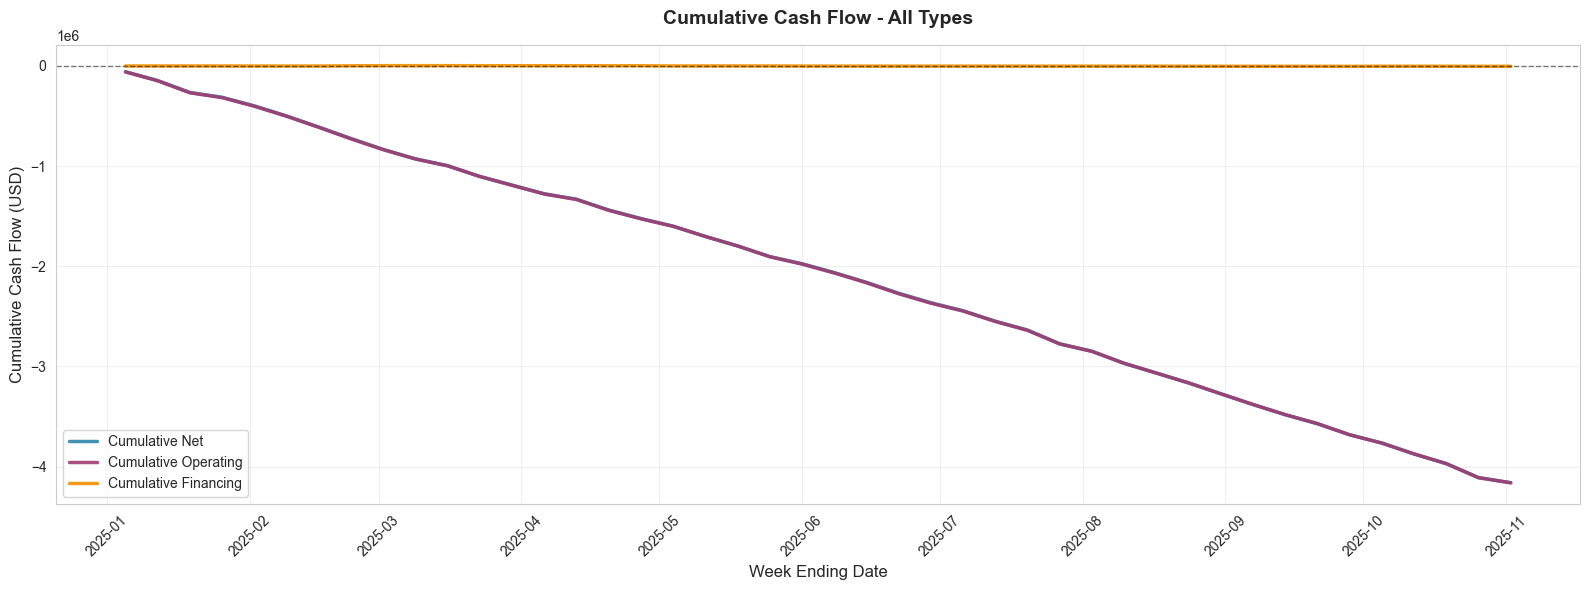

In [37]:
# Calculate cumulative cash flows
ts_data['Cumulative_Net'] = ts_data['Net_Cash_Flow'].cumsum()
ts_data['Cumulative_Operating'] = ts_data['Operating_Cash_Flow'].cumsum()
ts_data['Cumulative_Financing'] = ts_data['Financing_Cash_Flow'].cumsum()

# Plot cumulative cash flows
fig, ax = plt.subplots(figsize=(16, 6))

ax.plot(ts_data.index, ts_data['Cumulative_Net'], linewidth=2.5, color=COLORS['net'], 
        label='Cumulative Net', alpha=0.9)
ax.plot(ts_data.index, ts_data['Cumulative_Operating'], linewidth=2.5, color=COLORS['operating'], 
        label='Cumulative Operating', alpha=0.9)
ax.plot(ts_data.index, ts_data['Cumulative_Financing'], linewidth=2.5, color=COLORS['financing'], 
        label='Cumulative Financing', alpha=0.9)

ax.axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax.set_title('Cumulative Cash Flow - All Types', fontweight='bold', pad=15)
ax.set_xlabel('Week Ending Date')
ax.set_ylabel('Cumulative Cash Flow (USD)')
ax.legend(loc='best', frameon=True)
ax.grid(True, alpha=0.3)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 8. Seasonal Decomposition (Net Cash Flow)

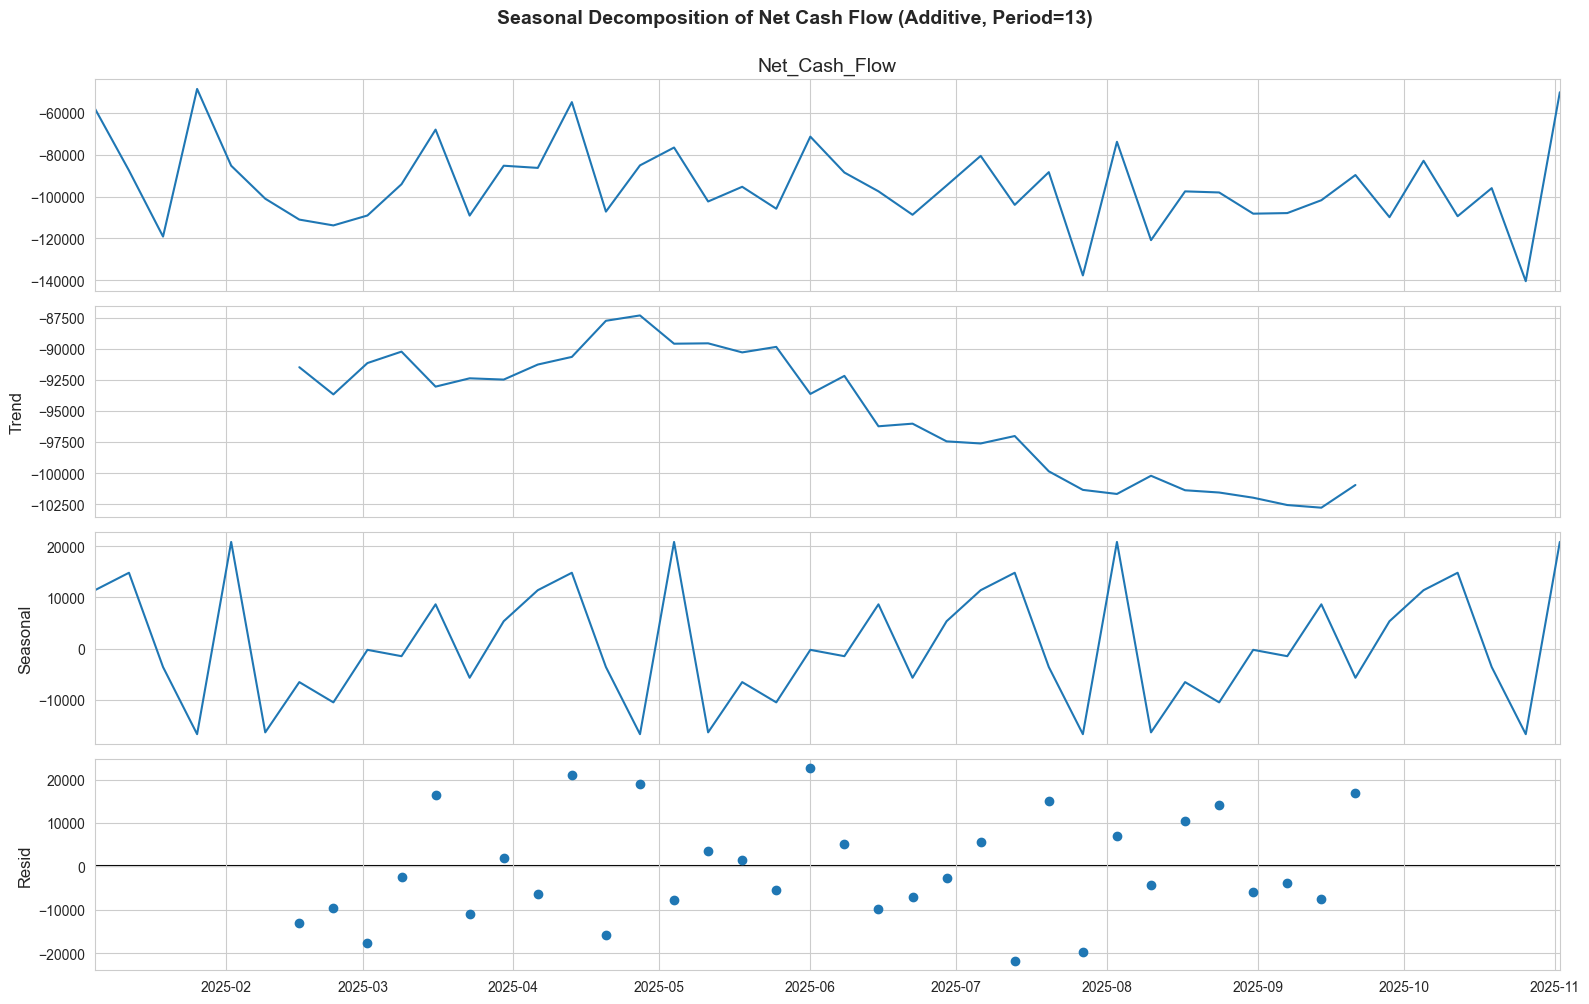

In [38]:
# Seasonal decomposition - Net Cash Flow only (focus on primary metric)
decomposition = seasonal_decompose(ts_data['Net_Cash_Flow'], model='additive', period=13)

fig = decomposition.plot()
fig.set_size_inches(16, 10)
fig.suptitle('Seasonal Decomposition of Net Cash Flow (Additive, Period=13)', 
             fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

## 9. Autocorrelation Analysis (Net Cash Flow)

ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 30 must be < 22.

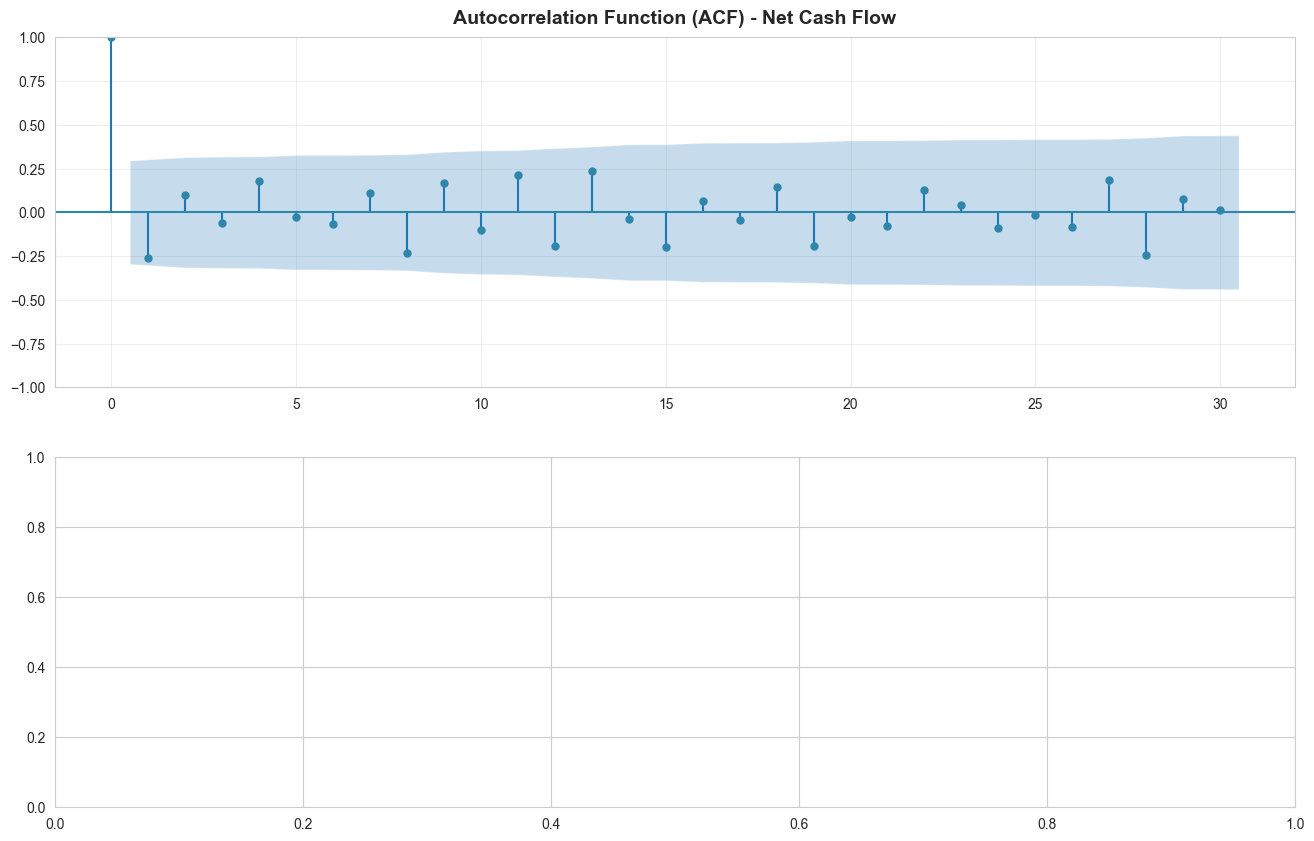

In [39]:
# ACF and PACF for Net Cash Flow
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10))

plot_acf(ts_data['Net_Cash_Flow'].dropna(), lags=30, ax=ax1, color=COLORS['net'])
ax1.set_title('Autocorrelation Function (ACF) - Net Cash Flow', fontweight='bold', pad=10)
ax1.grid(True, alpha=0.3)

plot_pacf(ts_data['Net_Cash_Flow'].dropna(), lags=30, ax=ax2, color=COLORS['net'])
ax2.set_title('Partial Autocorrelation Function (PACF) - Net Cash Flow', fontweight='bold', pad=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Anomaly Detection

In [ ]:
# Anomaly detection using rolling mean ± 2 standard deviations
upper_bound_net = rolling_net_mean + 2 * rolling_net_std
lower_bound_net = rolling_net_mean - 2 * rolling_net_std

anomalies = ts_data[(ts_data['Net_Cash_Flow'] > upper_bound_net) | 
                    (ts_data['Net_Cash_Flow'] < lower_bound_net)].copy()

fig, ax = plt.subplots(figsize=(16, 6))

ax.plot(ts_data.index, ts_data['Net_Cash_Flow'], linewidth=1.5, color=COLORS['net'], 
        alpha=0.7, label='Net Cash Flow')
ax.plot(ts_data.index, rolling_net_mean, linewidth=2, color='darkblue', 
        linestyle='--', label='Rolling Mean')
ax.fill_between(ts_data.index, lower_bound_net, upper_bound_net, 
                color='gray', alpha=0.2, label='Normal Range (±2σ)')
ax.scatter(anomalies.index, anomalies['Net_Cash_Flow'], color='red', s=100, 
           zorder=5, label=f'Anomalies (n={len(anomalies)})', marker='X')

ax.set_title('Anomaly Detection - Net Cash Flow', fontweight='bold', pad=15)
ax.set_xlabel('Week Ending Date')
ax.set_ylabel('Net Cash Flow (USD)')
ax.legend(loc='best', frameon=True)
ax.grid(True, alpha=0.3)
ax.axhline(0, color='black', linestyle='--', linewidth=0.8, alpha=0.5)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

if len(anomalies) > 0:
    print(f"\nDetected {len(anomalies)} anomalies:")
    print(anomalies[['Net_Cash_Flow']].sort_values('Net_Cash_Flow'))

## 11. Monthly and Yearly Patterns

In [ ]:
# Add temporal features
df_temp = df.copy()
df_temp['Month'] = df_temp['Week_Ending_Date'].dt.month
df_temp['Year'] = df_temp['Week_Ending_Date'].dt.year

# Boxplot by Month
fig, ax = plt.subplots(figsize=(16, 6))
df_temp.boxplot(column='Net_Cash_Flow', by='Month', ax=ax, patch_artist=True,
                boxprops=dict(facecolor=COLORS['net'], alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
ax.set_title('Net Cash Flow Distribution by Month', fontweight='bold', pad=15)
ax.set_xlabel('Month')
ax.set_ylabel('Net Cash Flow (USD)')
ax.grid(True, alpha=0.3)
plt.suptitle('')  # Remove default title
plt.tight_layout()
plt.show()

In [ ]:
# Year-Month Heatmap
heatmap_data = df_temp.groupby(['Year', 'Month'])['Net_Cash_Flow'].mean().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='RdBu_r', center=0, annot=True, fmt=".0f", 
            cbar_kws={'label': 'Mean Net Cash Flow (USD)'}, ax=ax, linewidths=0.5)
ax.set_title('Year-Month Heatmap (Mean Net Cash Flow)', fontweight='bold', pad=15)
ax.set_xlabel('Month')
ax.set_ylabel('Year')
plt.tight_layout()
plt.show()

## 12. Week-over-Week Change Analysis

In [ ]:
# Calculate week-over-week changes for all cash flow types
ts_data['WoW_Net'] = ts_data['Net_Cash_Flow'].diff()
ts_data['WoW_Operating'] = ts_data['Operating_Cash_Flow'].diff()
ts_data['WoW_Financing'] = ts_data['Financing_Cash_Flow'].diff()

# Create subplots for WoW changes
fig, axes = plt.subplots(3, 1, figsize=(16, 12), sharex=True)

# Net Cash Flow WoW
axes[0].plot(ts_data.index, ts_data['WoW_Net'], marker='o', linestyle='-', 
             linewidth=1.5, markersize=4, color=COLORS['net'])
axes[0].axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.7)
axes[0].set_title('Week-over-Week Change - Net Cash Flow', fontweight='bold', pad=10)
axes[0].set_ylabel('Change (USD)')
axes[0].grid(True, alpha=0.3)

# Operating Cash Flow WoW
axes[1].plot(ts_data.index, ts_data['WoW_Operating'], marker='s', linestyle='-', 
             linewidth=1.5, markersize=4, color=COLORS['operating'])
axes[1].axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.7)
axes[1].set_title('Week-over-Week Change - Operating Cash Flow', fontweight='bold', pad=10)
axes[1].set_ylabel('Change (USD)')
axes[1].grid(True, alpha=0.3)

# Financing Cash Flow WoW
axes[2].plot(ts_data.index, ts_data['WoW_Financing'], marker='^', linestyle='-', 
             linewidth=1.5, markersize=4, color=COLORS['financing'])
axes[2].axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.7)
axes[2].set_title('Week-over-Week Change - Financing Cash Flow', fontweight='bold', pad=10)
axes[2].set_ylabel('Change (USD)')
axes[2].set_xlabel('Week Ending Date')
axes[2].grid(True, alpha=0.3)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary statistics for WoW changes
print("\nWeek-over-Week Change Statistics:")
print("="*60)
print(f"Net Cash Flow - Mean: {ts_data['WoW_Net'].mean():.2f}, Std: {ts_data['WoW_Net'].std():.2f}")
print(f"Operating Cash Flow - Mean: {ts_data['WoW_Operating'].mean():.2f}, Std: {ts_data['WoW_Operating'].std():.2f}")
print(f"Financing Cash Flow - Mean: {ts_data['WoW_Financing'].mean():.2f}, Std: {ts_data['WoW_Financing'].std():.2f}")

## Summary

This notebook provided comprehensive EDA for weekly cash flow data including:

1. **Time Series Analysis**: Separate and combined visualizations for Net, Operating, and Financing cash flows
2. **Country-Level Insights**: Total and average cash flows by country with error bars and time series breakdowns
3. **Distribution Analysis**: Boxplots with quartile labels, violin plots, and histograms
4. **Rolling Statistics**: 4-week rolling means with confidence intervals for all cash flow types
5. **Cumulative Analysis**: Tracking cumulative positions over time
6. **Advanced Analytics**: Seasonal decomposition, autocorrelation, and anomaly detection
7. **Temporal Patterns**: Monthly distributions and year-month heatmaps
8. **Change Analysis**: Week-over-week changes for all cash flow types

All visualizations use consistent color coding, clear labels, and appropriate figure sizes for readability.